In [1]:
#Inicialização de dependências das bibliotecas:
import subprocess

def instalar_dependencias():
    subprocess.call(['pip','install','-r','requirements.txt'])

if __name__ == "__main__":
    instalar_dependencias()
    print('Dependências instaladas')


Dependências instaladas


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
#função utilizado para mapear os valores da variável PHQ9
def mapa_valores(x):
    if x < 5:
        return 0
    elif x < 10:
        return 1
    elif x >= 10:
        return 2
    else:
        return

def mapa_valores_idade(x):
    if x <= 60: 
        return 1
    elif x > 60:
        return 2
    else:
        return
    
## Função geradora de gráfico

def calcula_porcentagem(df, coluna: str):

    total_coluna = str('total_' + coluna)
    coluna_pct = str('pct_' + coluna)

    df_coluna = df.groupby([coluna]).size().reset_index(name='total_classe')

    df_coluna_phq9_class = df.groupby(['PHQ9_CLASS',coluna]).size().reset_index(name=total_coluna)

    df_coluna = pd.merge(df_coluna,df_coluna_phq9_class,on=[coluna,coluna])

    df_coluna[coluna_pct] = df_coluna[total_coluna] * 100 / df_coluna['total_classe']
    
    return df_coluna


def gera_grafico(df_categoria, categorias, coluna, traducao_coluna):

    

    coluna = str('pct_'+coluna)

    valores1 = df_categoria.loc[df_categoria['PHQ9_CLASS'] == 0, coluna]
    valores2 = df_categoria.loc[df_categoria['PHQ9_CLASS'] == 1, coluna]
    valores3 = df_categoria.loc[df_categoria['PHQ9_CLASS'] == 2, coluna]


    # Criar o gráfico de barras empilhadas
    plt.bar(categorias, valores1, color= '#011E38', label='Sem Sintomas',zorder=3)
    plt.bar(categorias, valores2, color= '#FF5E6C', bottom=valores1, label='Sintomas Leves',zorder=3)
    plt.bar(categorias, valores3, color= '#264EF9', bottom=np.array(valores1)+np.array(valores2), label='Sintomas Graves', zorder=3)

    # Adicionar legendas e rótulos
    plt.xticks(fontsize=6)
    plt.xlabel(traducao_coluna)
    plt.ylabel('Percentual (%)')
    plt.title('Prevalência de sintomas de depressão 2005-2006 ')
    plt.grid(alpha=0.3)
    plt.legend()

    # Mostrar o gráfico
    plt.show()

<h2>Entendendo o dataset DEMO PHQ:</h2>

<b>SEQN:</b> Chave única do entrevistado (ID)

<b>DPQ010:</b> Pouco interesse ou pouco prazer em fazer as coisas

<b>DPQ020:</b> Se sentiu para baixo, deprimido(a) ou sem perspectiva

<b>DPQ030:</b> Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o
costume

<b>DPQ040:</b> Se sentiu cansado(a) ou com pouca energia

<b>DPQ050:</b> Falta de apetite ou comeu demais

<b>DPQ060:</b> Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou
sua família ou a você mesmo(a) 

<b>DPQ070:</b> Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)

<b>DPQ080:</b> Teve lentidão para se movimentar ou falar (a ponto de outras pessoas
perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de
um lado para o outro mais do que costume

<b>DPQ090:</b> Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)

<b>RIAGENDR:</b> Gênero do respondente

<b>RIDAGEYR:</b> Idade do respondente

<b>RIDRETH1:</b> Raça / Etnia

<b>DMDEDUC:</b> Escolaridade 

<b>INDFMINC:</b> Renda anual familiar (US$)

In [4]:
demo = pd.read_csv('DEMO_PHQ.csv')
demo

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0


In [5]:
#Estatísticas básicas das features do nosso dataset
demo.describe()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
count,5334.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,5334.000000,5334.000000,5334.000000,5334.000000,5287.000000
mean,36358.796775,0.307279,0.313069,0.551282,0.717328,0.320720,0.209884,0.230356,0.147849,0.050248,1.519873,45.089989,2.871016,3.233221,8.738604
std,2964.731827,0.758459,0.710683,0.931166,0.913711,0.743057,0.624552,0.639186,0.590390,0.326933,0.499652,20.145853,1.128468,1.268395,12.777756
min,31130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000
25%,33838.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,4.000000
50%,36347.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,3.000000,3.000000,7.000000
75%,38915.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,62.000000,4.000000,4.000000,10.000000
max,41473.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,85.000000,5.000000,9.000000,99.000000


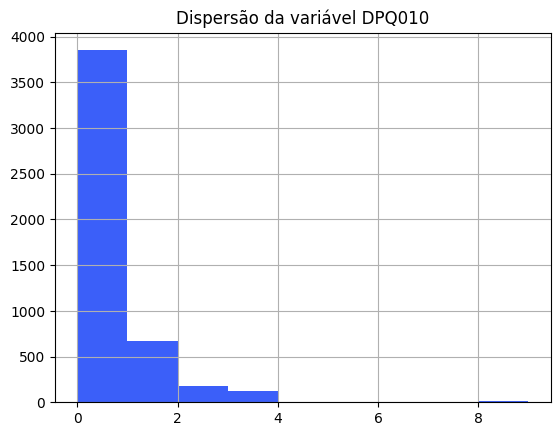

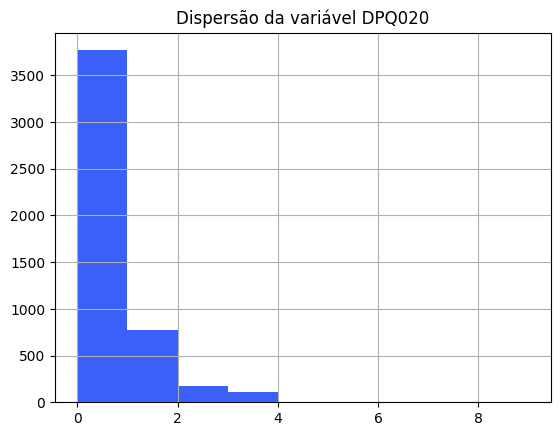

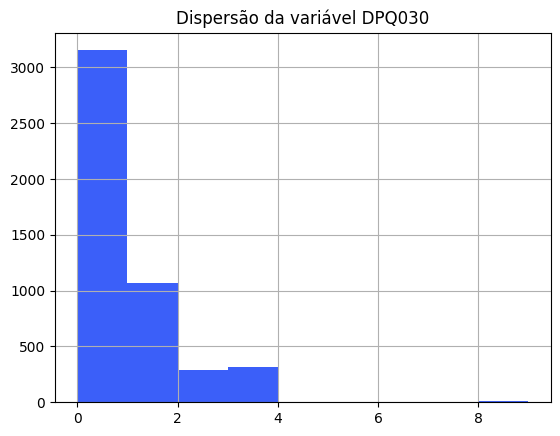

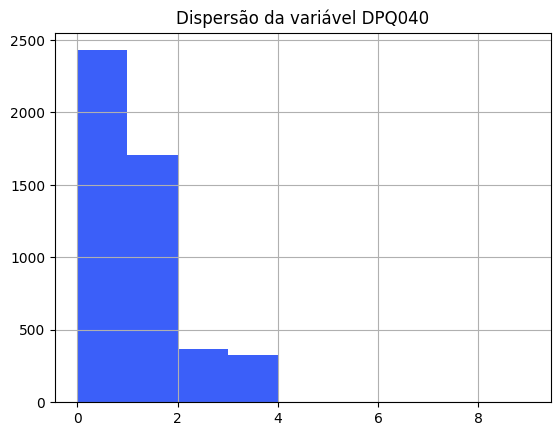

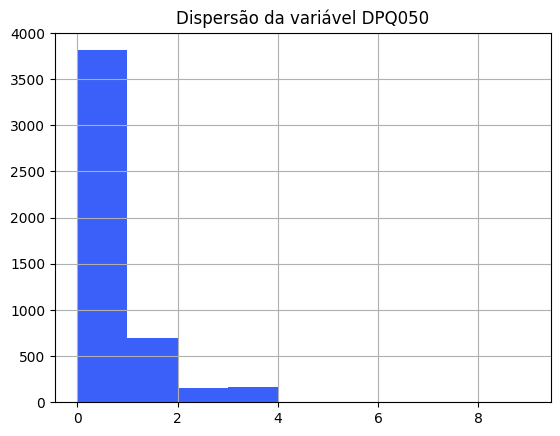

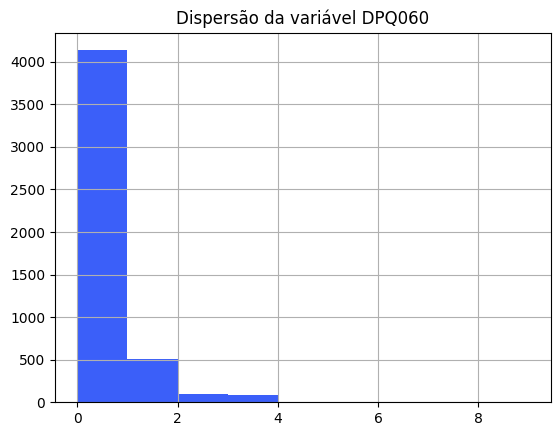

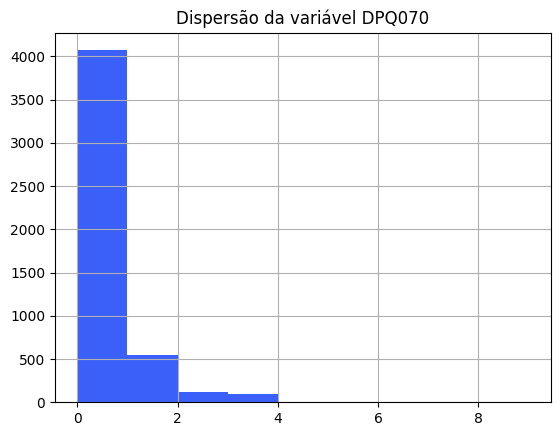

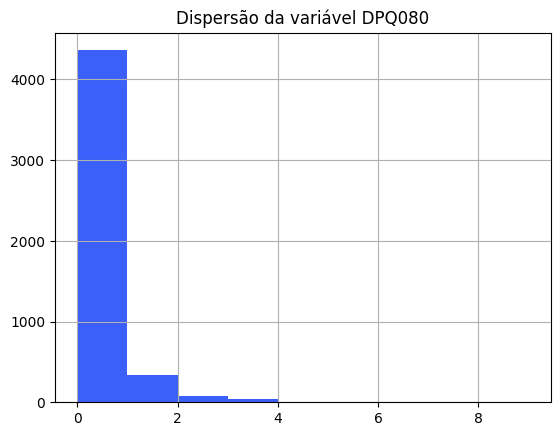

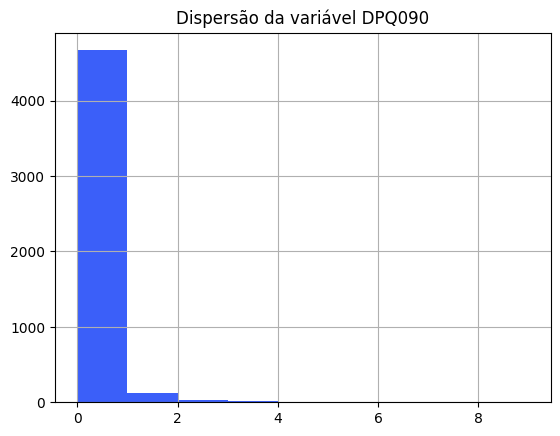

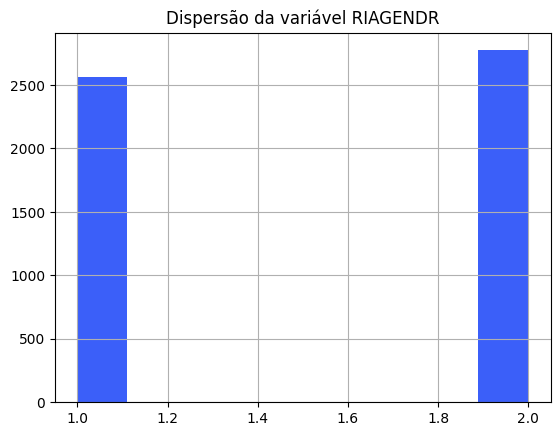

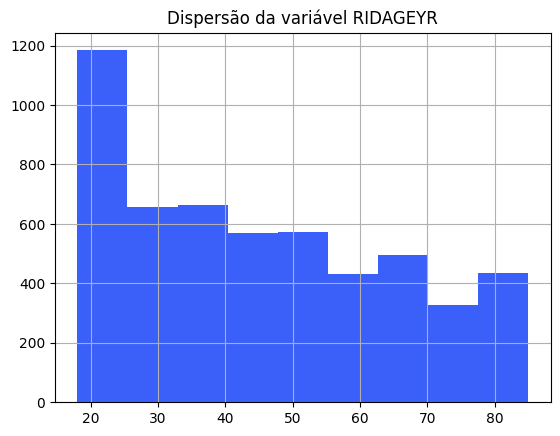

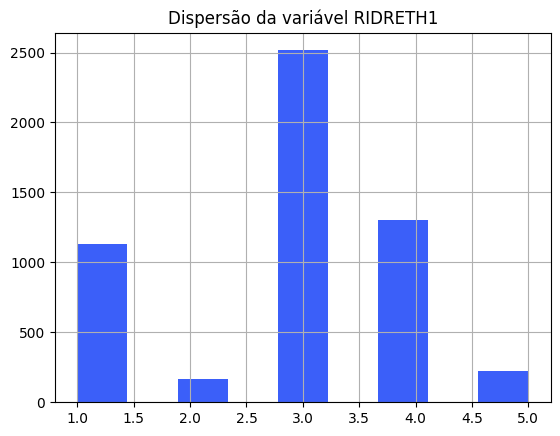

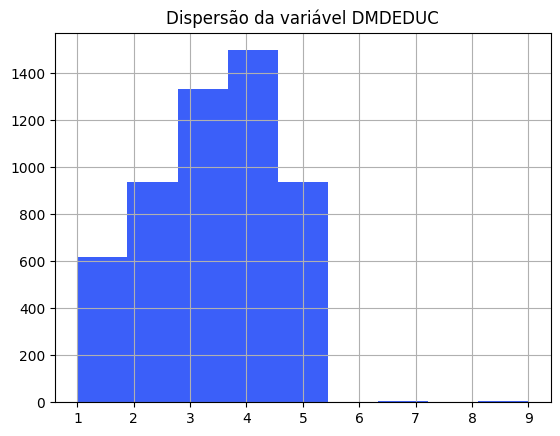

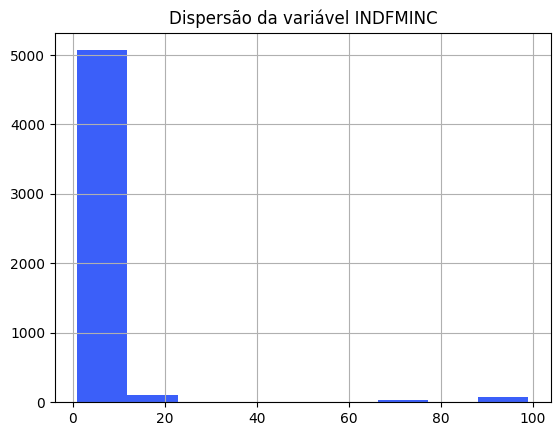

In [6]:
i = 1

for i in range(1,len(demo.columns)):
    plt.hist(
        demo[demo.columns[i]]
        , bins  = 9
        , alpha = 0.9
        , color='#264EF9'
        )

    #plt.xlabel('Valores')
    #plt.ylabel('Frequência')
    plt.title(f'Dispersão da variável {str(demo.columns[i])}'),
    plt.grid()
    plt.show()

<h2>Entendendo o dataset PAG_HEI:</h2>

<b>SEQN:</b> Chave única do entrevistado (ID)

<b>PAG_MINW:</b> Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline (PAG)

<b>ADHERENCE:</b> Healthy Eating Index - Componente 1 - Total de Vegetais

<b>HEI2015C2_GREEN_AND_BEAN:</b> Healthy Eating Index - Componente 2 - Verduras verde-escuras e leguminosas

<b>HEI2015C3_TOTALFRUIT:</b> Healthy Eating Index - Componente 3 - Frutas totais

<b>HEI2015C4_WHOLEFRUIT:</b> Healthy Eating Index - Componente 4 - Frutas in natura

<b>HEI2015C5_WHOLEGRAIN:</b> Healthy Eating Index - Componente 5 - Grãos integrais

<b>HEI2015C6_TOTALDAIRY:</b> Healthy Eating Index - Componente 6 - Laticínios

<b>HEI2015C7_TOTPROT:</b> Healthy Eating Index - Componente 7 - Proteínas

<b>HEI2015C8_SEAPLANT_PROT:</b> Healthy Eating Index - Componente 8 - Plantas marinhas e proteínas vegetais

<b>HEI2015C9_FATTYACID:</b> Healthy Eating Index - Componente 9 - Ácido-graxo

<b>HEI2015C10_SODIUM:</b> Healthy Eating Index - Componente 10 - Sódio

<b>HEI2015C11_REFINEDGRAIN:</b> Healthy Eating Index - Componente 11 - Grãos refinados

<b>HEI2015C12_SFAT:</b> Healthy Eating Index - Componente 12 - Gordura saturada 

<b>HEI2015C13_ADDSUG:</b> Healthy Eating Index - Componente 13 - Açúcares adicionados

<b>HEI2015_TOTAL_SCORE:</b> Healthy Eating Index - Escore total

In [7]:
pag = pd.read_csv('PAG_HEI.csv')
pag

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
9420,41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
9421,41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467
9422,41473,685.912240,3.0,3.907340,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,7.458058,10.000000,1.676912,2.751168,45.793478


In [8]:
pag.describe()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,9424.000000,7150.000000,7150.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000
mean,36311.463285,565.120067,2.074685,2.862097,1.547884,2.659902,2.405864,1.674949,4.054757,4.211867,2.325303,4.205320,4.988956,5.540906,5.781459,5.959600,48.218865
std,2991.517794,908.839544,0.917351,1.472391,2.046650,1.930251,2.152560,1.823515,1.478922,1.157194,2.132526,3.147736,3.293786,3.452289,3.090926,3.215960,11.884725
min,31128.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.243513
25%,33720.750000,55.427252,1.000000,1.692308,0.000000,0.725494,0.000000,0.000000,3.336989,3.587339,0.000000,1.544438,2.258630,2.652670,3.514716,3.599885,39.643349
50%,36307.500000,256.351039,2.000000,2.753825,0.000000,2.618554,2.179715,1.018207,5.000000,5.000000,1.836220,3.789177,5.144181,5.880968,5.979335,6.327416,47.589498
75%,38902.250000,696.016166,3.000000,4.165605,3.498013,5.000000,5.000000,2.997076,5.000000,5.000000,5.000000,6.464805,7.705660,8.756728,8.390884,8.859520,56.028859
max,41474.000000,13801.385681,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383


Ambos os datasets parecem estar relacionados pelo campo SEQN (PK de ambos datasets)

Realizando join para unir as infos

In [9]:
#Criando um novo dataset

df_join = demo.set_index('SEQN').join(
    pag.set_index('SEQN') 
    ,lsuffix= 'caller'
    ,rsuffix='other'
    , on='SEQN')


df_join

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,,,,,,
31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,...,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,...,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323


<h2> Nova feature: </h2>

Criando nova variável para metrificar os resultados de todas as perguntas do formulário em 1 único valor
phq9

Resultado somado das perguntas:

<ul> 

<li> 0 (“sem sintomas”) se phq9 < 5 </li>
<li> 1 (“sintomas leves”) se 5 <= phq9 < 10 </li>
<li> 2 (“sintomas moderados a severos”) se  phq9 >= 10 </li>
 
</ul>

In [10]:
#Nova variável 

df_join['PHQ9'] = df_join['DPQ010'] + df_join['DPQ020'] + df_join['DPQ030'] + df_join['DPQ040'] + df_join['DPQ050'] + df_join['DPQ060'] + df_join['DPQ070'] + df_join['DPQ080'] + df_join['DPQ090']



In [11]:
df_join['PHQ9_CLASS'] = df_join['PHQ9'].map(lambda x: mapa_valores(x))
df_join['RIDAGEYR_CLASS'] = df_join['RIDAGEYR'].map(lambda x: mapa_valores_idade(x))
 

df_final = df_join[df_join['DMDEDUC'] != 9]
df_final = df_final.reset_index().dropna()

<h2> Análise multivariada: </h2>

1. Vamos analisar nossa varíavel de interesse (PHQ9_CLASS) dentro de alguns grupos selecionados que podem ser de nosso interesse:

    a. Gênero (Masculino, Feminino)

    b. Raça (Branco Não Hispânico, Negro Não Hispânico, Mexicano-Americano, Outro, Outro-Hispânico)
    
    c. Escolaridade (Ensino Fundamental, Médio e Superior)
    
    d. Renda Familiar (Faixas Salariais)
    
    e. Idade (criança, jovem, adulto, idoso)

2. Testar se existem diferenças significativas entre as proporções de pacientes com sintomas <b>GRAVES ou LEVES</b> vs. <b>SEM SINTOMAS</b> para cada uma das categorias dos grupos acima

In [12]:
df_genero = calcula_porcentagem(df_final, 'RIAGENDR')

df_idade = calcula_porcentagem(df_final, 'RIDAGEYR_CLASS')

df_etnia = calcula_porcentagem(df_final,'RIDRETH1')

df_educacao = calcula_porcentagem(df_final, 'DMDEDUC')

df_renda = calcula_porcentagem(df_final, 'INDFMINC')

In [13]:
df_idade

,RIDAGEYR_CLASS,total_classe,PHQ9_CLASS,total_RIDAGEYR_CLASS,pct_RIDAGEYR_CLASS
0,1,3473,0.0,2706,77.915347
1,1,3473,1.0,528,15.202995
2,1,3473,2.0,239,6.881659
3,2,1228,0.0,999,81.351792
4,2,1228,1.0,156,12.703583
5,2,1228,2.0,73,5.944625


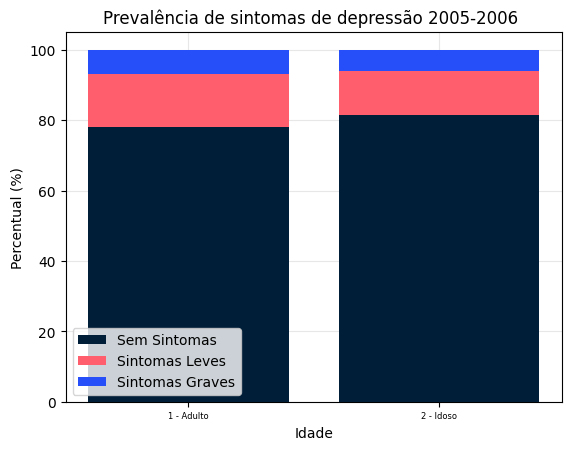

In [14]:
gera_grafico(df_idade, ['1 - Adulto', '2 - Idoso'], 'RIDAGEYR_CLASS','Idade')

In [15]:
df_genero

,RIAGENDR,total_classe,PHQ9_CLASS,total_RIAGENDR,pct_RIAGENDR
0,1,2265,0.0,1862,82.207506
1,1,2265,1.0,273,12.052980
2,1,2265,2.0,130,5.739514
3,2,2436,0.0,1843,75.656814
4,2,2436,1.0,411,16.871921
5,2,2436,2.0,182,7.471264


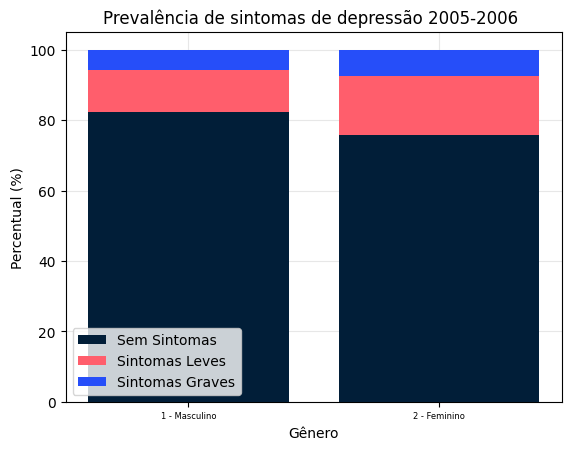

In [16]:
gera_grafico(df_genero, ['1 - Masculino', '2 - Feminino'], 'RIAGENDR','Gênero')

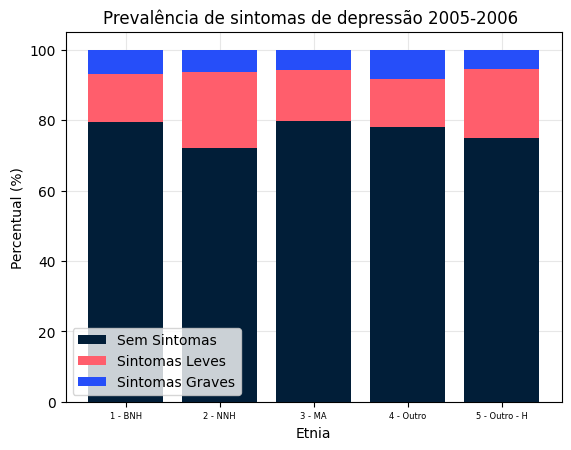

In [17]:
gera_grafico(df_etnia, ['1 - BNH', '2 - NNH', '3 - MA', '4 - Outro', '5 - Outro - H'], 'RIDRETH1','Etnia')

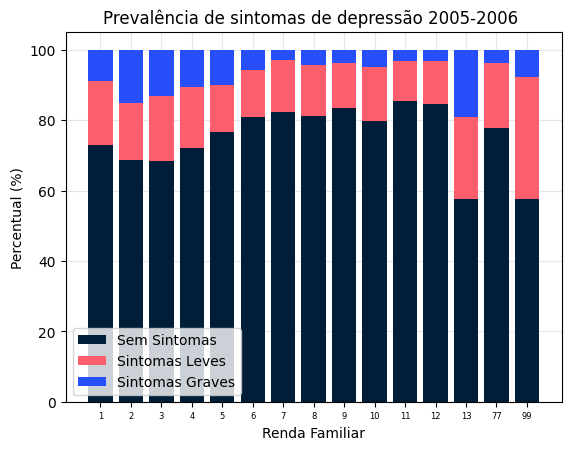

In [18]:
gera_grafico(df_renda, ['1' , '2', '3', '4','5','6','7','8','9','10','11','12','13', '77','99'], 'INDFMINC','Renda Familiar')

In [19]:
df_educacao

,DMDEDUC,total_classe,PHQ9_CLASS,total_DMDEDUC,pct_DMDEDUC
0,1,497,0.0,373,75.050302
1,1,497,1.0,69,13.883300
2,1,497,2.0,55,11.066398
3,2,806,0.0,594,73.697270
4,2,806,1.0,146,18.114144
5,2,806,2.0,66,8.188586
6,3,1191,0.0,928,77.917716
7,3,1191,1.0,178,14.945424
8,3,1191,2.0,85,7.136860
9,4,1346,0.0,1065,79.123328


In [20]:
df_educacao

,DMDEDUC,total_classe,PHQ9_CLASS,total_DMDEDUC,pct_DMDEDUC
0,1,497,0.0,373,75.050302
1,1,497,1.0,69,13.883300
2,1,497,2.0,55,11.066398
3,2,806,0.0,594,73.697270
4,2,806,1.0,146,18.114144
5,2,806,2.0,66,8.188586
6,3,1191,0.0,928,77.917716
7,3,1191,1.0,178,14.945424
8,3,1191,2.0,85,7.136860
9,4,1346,0.0,1065,79.123328


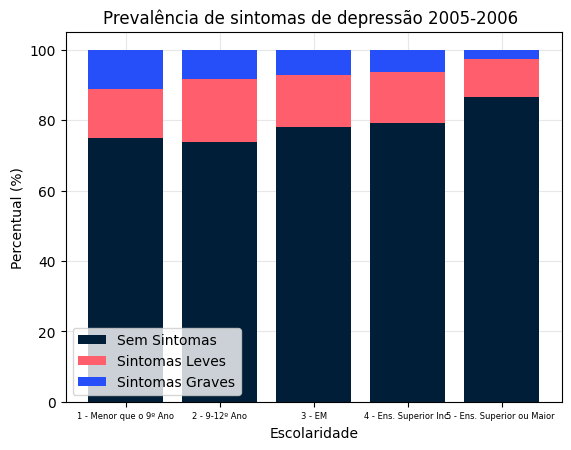

In [21]:
gera_grafico(
    df_educacao[df_educacao['DMDEDUC'] != 9]
    ,['1 - Menor que o 9º Ano', '2 - 9-12º Ano', '3 - EM', '4 - Ens. Superior Inc.', '5 - Ens. Superior ou Maior ']
    ,'DMDEDUC'
    ,'Escolaridade')

<h2> Teste de Hipótese </h2>

Após análise das variáveis disponíveis dentro do nosso problema, queremos investigar a diferença entre a prevalência de sintomas leves e graves de depressão nos grupos de Homens e Mulheres. Para isso será necessário considerar um teste de hipótese.

Para podermos utilizar o teste Z para duas amostras e duas categorias, vamos fazer a comparação entre "Sintomas" e "Sem Sintomas" olhando para Gênero do respondente

https://hotmart.com/pt-BR/club/renata-biaggi/products/2383959/content/2OM0Nq0o76

In [22]:
df_genero

,RIAGENDR,total_classe,PHQ9_CLASS,total_RIAGENDR,pct_RIAGENDR
0,1,2265,0.0,1862,82.207506
1,1,2265,1.0,273,12.052980
2,1,2265,2.0,130,5.739514
3,2,2436,0.0,1843,75.656814
4,2,2436,1.0,411,16.871921
5,2,2436,2.0,182,7.471264


In [23]:
#Dividimos o dataset em generos masculino (1) e feminino (2)
df_genero_masculino = df_genero[df_genero['RIAGENDR'] == 1]
df_genero_feminino = df_genero[df_genero['RIAGENDR'] == 2]

#Agrupamos os sintomas leves e graves em 1 unico grupo "com sintomas"
df_genero_masculino_com_sintomas = df_genero_masculino[(df_genero_masculino['PHQ9_CLASS'] == 1.0) | (df_genero_masculino['PHQ9_CLASS'] == 2.0)]
df_genero_feminino_com_sintomas = df_genero_feminino[(df_genero_feminino['PHQ9_CLASS'] == 1.0) | (df_genero_feminino['PHQ9_CLASS'] == 2.0)]

#Juntamos os "sucessos", ou seja, as pessoas com sintomas no nosso estudo em uma lista. Como já tinhámos agrupado antes por nivel de sintoma, para confecção dos gráficos, podemos simplesmente
#somar a coluna total_RIAGENDR
sucesses = [df_genero_masculino_com_sintomas['total_RIAGENDR'].sum(), df_genero_feminino_com_sintomas['total_RIAGENDR'].sum()]

#Consideramos o tamanho total das amostras apenas considerando a coluna total_classe.

#Como o resultado é uma lista, precisamos retirar o valor da mesma para utilizar no teste de hipótese
n_mas = df_genero_masculino['total_classe'].unique()[0]
n_fem = df_genero_feminino['total_classe'].unique()[0]

n_obs = [n_mas,n_fem]

n_obs

[2265, 2436]

H0 : % de Homens com sintomas depressivos >= % de Mulheres com sintomas depressivos

H1 : % de Homens com sintomas depressivos < % de Mulheres com sintomas depressivos

alfa = 0.05, nivel de confiança: 95%

In [24]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

stat, pvalue = proportions_ztest(
    sucesses
    ,nobs=n_obs
    , alternative='smaller')

print(stat, pvalue)

-5.492008666987337 1.986939429027323e-08


Logo, podemos REJEITAR a hipótese nula uma vez que z_stat < -1.96 e o p-valor < 0.05. 

Assim, podemos afirmar, com nivel de confiança 95%, que a incidência de sintomas depressivos em mulheres do Reino Unido é maior

In [25]:
from statsmodels.stats.proportion import proportions_chisquare

Documentação do Qui-Quadrado:

Parameters
count: {int, array_like}
the number of successes in nobs trials. If this is array_like, then the assumption is that this represents the number of successes for each independent sample

nobs: {int}
the number of trials or observations, with the same length as count.

value: None or float or array_like


In [26]:
#Separando por tipo de educação

df_educacao_1 = df_final['SEQN'][df_final['DMDEDUC'] == 1].count()
df_educacao_2 = df_final['SEQN'][df_final['DMDEDUC'] == 2].count()
df_educacao_3 = df_final['SEQN'][df_final['DMDEDUC'] == 3].count()
df_educacao_4 = df_final['SEQN'][df_final['DMDEDUC'] == 4].count()
df_educacao_5 = df_final['SEQN'][df_final['DMDEDUC'] == 5].count()

total_amostras = [df_educacao_1, df_educacao_2, df_educacao_3, df_educacao_4, df_educacao_5]

df_educacao_1_sucessos = df_final['SEQN'][(df_final['DMDEDUC'] == 1) & (df_final['PHQ9_CLASS']==1.0) |   (df_final['PHQ9_CLASS']==2.0)].count()
df_educacao_2_sucessos = df_final['SEQN'][(df_final['DMDEDUC'] == 2) & (df_final['PHQ9_CLASS']==1.0) |   (df_final['PHQ9_CLASS']==2.0)].count()
df_educacao_3_sucessos = df_final['SEQN'][(df_final['DMDEDUC'] == 3) & (df_final['PHQ9_CLASS']==1.0) |   (df_final['PHQ9_CLASS']==2.0)].count()
df_educacao_4_sucessos = df_final['SEQN'][(df_final['DMDEDUC'] == 4) & (df_final['PHQ9_CLASS']==1.0) |   (df_final['PHQ9_CLASS']==2.0)].count()
df_educacao_5_sucessos = df_final['SEQN'][(df_final['DMDEDUC'] == 5) & (df_final['PHQ9_CLASS']==1.0) |   (df_final['PHQ9_CLASS']==2.0)].count()

total_sucessos = [df_educacao_1_sucessos ,df_educacao_2_sucessos ,df_educacao_3_sucessos ,df_educacao_4_sucessos ,df_educacao_5_sucessos]

In [27]:
teste = proportions_chisquare(
    total_sucessos,
    total_amostras,
    value = None
)

print(teste[0], teste[1])

267.3065234050549 1.214347077607732e-56


Podemos REJEITAR a hipótese nula de que todos os índices de depressão dependendo da escolaridade do entrevistado são iguais.

Para finalizar a análise, vamos explorar a hipótese da incidência de sintomas depressivos em populações com nivel educacional menor que o 9º Ano ser maior que para pessoas com ensino superior ou pós graduação

H0: p1 <= p2

H1: p1 > p2

In [29]:
sucesses = [df_educacao_1_sucessos, df_educacao_5_sucessos]
n_obs    = [df_educacao_1, df_educacao_5]

stat, pvalue = proportions_ztest(
    sucesses
    ,nobs=n_obs
    , alternative='larger')

print(stat, pvalue)

10.610284764126538 1.3346713840636598e-26


Com p-valor < 0.05 podemos rejeitar a hipótese nula e afirmar, com 95% de confiança, que a incidência de sintomas depressivos em pessoas com menor grau de educação formal é estatisticamente maior. 